In [1]:
%pip install pandas openpyxl

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.3 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import os

# Path to your Excel file
excel_file = "hpps.xlsx"

# Output folder
output_folder = "hpps_translations"
os.makedirs(output_folder, exist_ok=True)

# Load all sheets
sheets = pd.read_excel(excel_file, sheet_name=None, engine="openpyxl")

# Dictionary to hold merged content for each language
lang_texts = {}
english_written = False

# Loop through each sheet
for i, (sheet_name, df) in enumerate(sheets.items()):
    # Get the language code from the sheet name (e.g., "ITEN - whatever" → "it")
    lang_code = sheet_name[:2].lower()

    # Get the first column as language X
    lang_col = df.iloc[:, 0].dropna().astype(str).tolist()
    merged_lang_text = "\n".join(lang_col)

    # Append to language-specific content
    if lang_code not in lang_texts:
        lang_texts[lang_code] = []
    lang_texts[lang_code].append(merged_lang_text)

    # For the FIRST sheet only: get English column (assumed to be 2nd column)
    if not english_written and df.shape[1] > 1:
        eng_col = df.iloc[:, 1].dropna().astype(str).tolist()
        merged_eng_text = "\n".join(eng_col)

        with open(os.path.join(output_folder, "en.txt"), "w", encoding="utf-8") as f:
            f.write(merged_eng_text)
        
        english_written = True  # Prevent writing again

# Write out all language X text files
for lang_code, texts in lang_texts.items():
    output_path = os.path.join(output_folder, f"{lang_code}.txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write("\n\n".join(texts))

print("✅ Done! All translations saved to 'hpps_translations/' folder.")


✅ Done! All translations saved to 'hpps_translations/' folder.


In [9]:
%pip install requests
%pip install matplotlib
%pip install PyPDF2
%pip install tiktoken
%pip install certifi
%pip install transformers


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.

In [ ]:
!export SSL_CERT_FILE=
!export REQUESTS_CA_BUNDLE=/etc/ssl/certs/MigrosPlusPublicCA.crt

In [13]:
from transformers import AutoTokenizer
qwen3 = AutoTokenizer.from_pretrained('Qwen/Qwen3-0.6B')('This is a test')
qwen3

{'input_ids': [1986, 374, 264, 1273], 'attention_mask': [1, 1, 1, 1]}

In [20]:
import tiktoken
encoding = tiktoken.get_encoding('o200k_base')
n_vocab = encoding.n_vocab
mr = len(encoding._mergeable_ranks)
st = len(encoding._special_tokens)
n_vocab - mr - st

19

In [7]:
import os
os.environ['SSL_CERT_FILE']='/etc/ssl/certs/MigrosPlusPublicCA.crt'

os.environ['REQUESTS_CA_BUNDLE']='/etc/ssl/certs/MigrosPlusPublicCA.crt'

PDF downloaded. Length of text: 4571214 characters.
Tokenizing with O200K tokenizer...
O200K results: Total Tokens: 1298924, Vocabulary: 14430, Usage Percentage: 1.11%, Time: 4.0158s


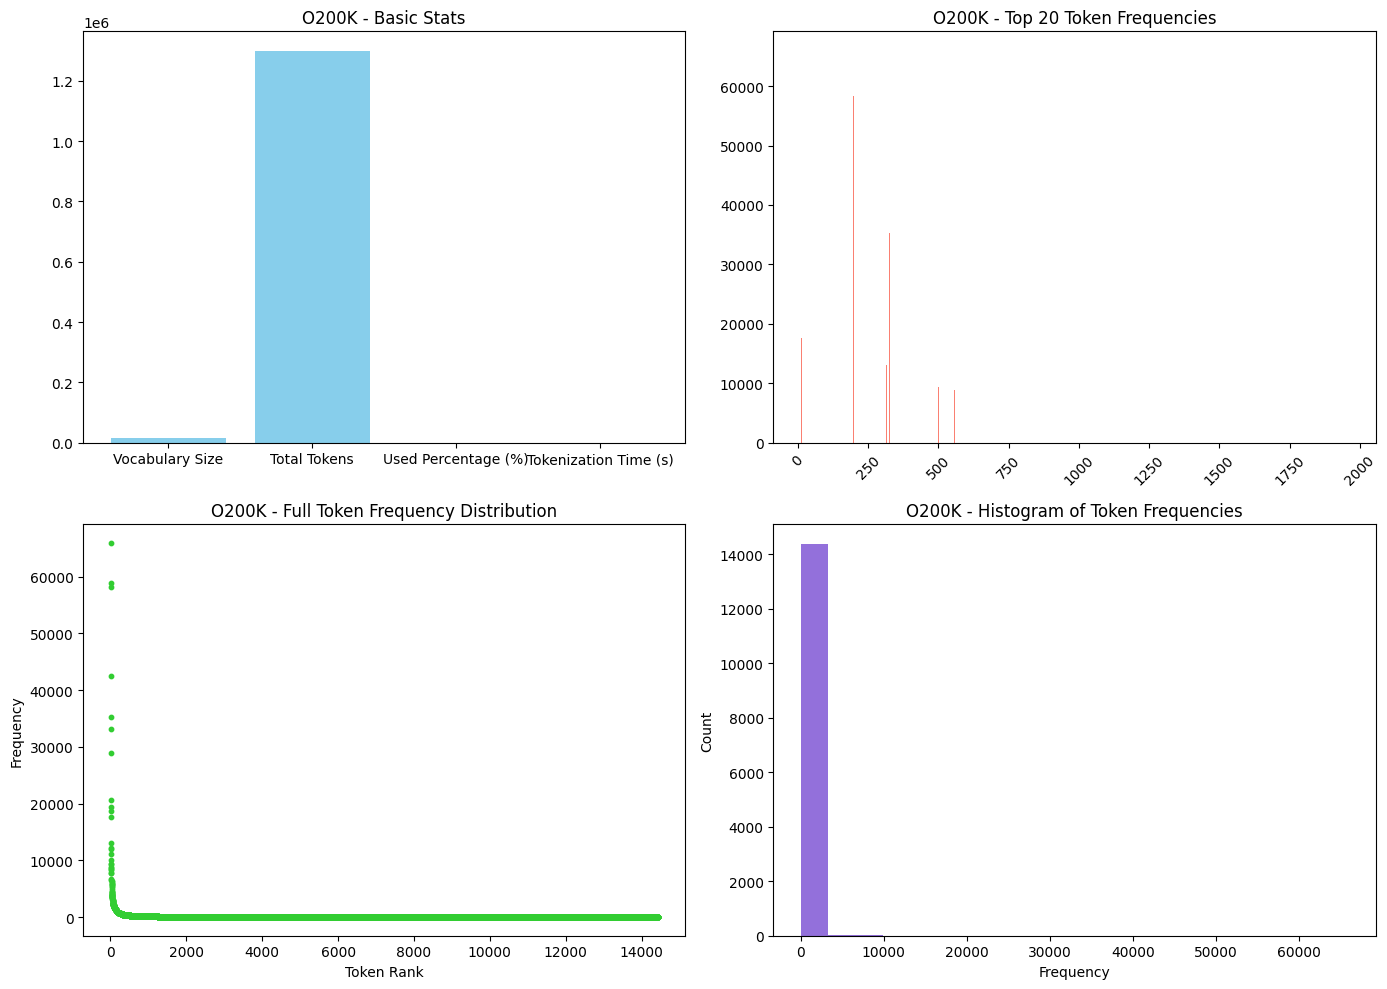

Tokenizing with CL100K tokenizer...
CL100K results: Total Tokens: 1307984, Vocabulary: 13544, Usage Percentage: 1.04%, Time: 1.5176s


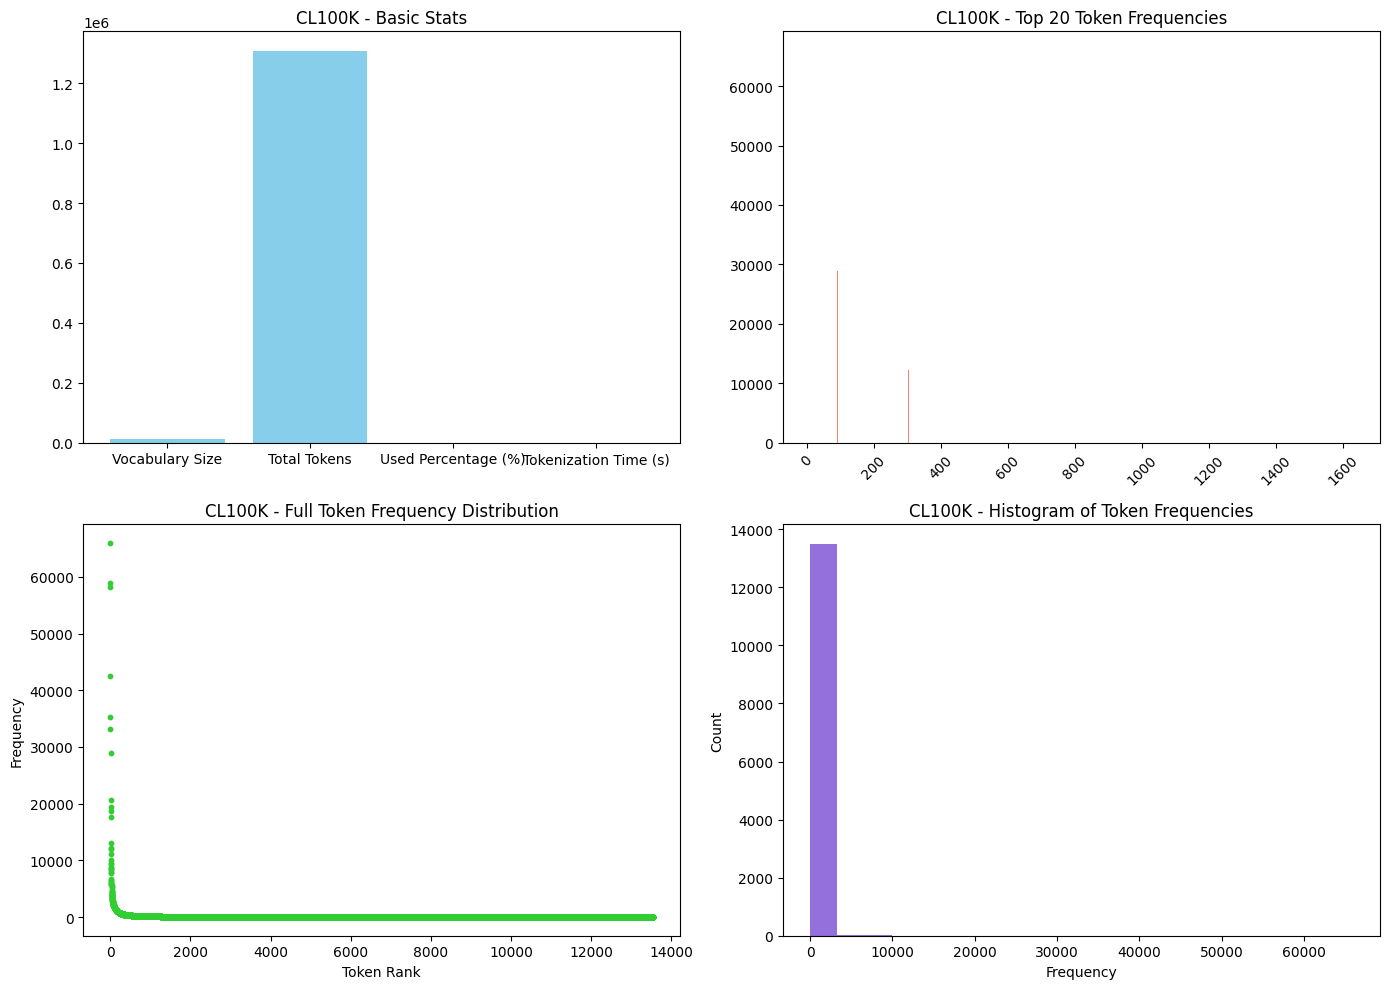

Tokenizing with Gemini tokenizer...
Gemini results: Total Tokens: 1151699, Vocabulary: 15810, Usage Percentage: 1.37%, Time: 0.0845s


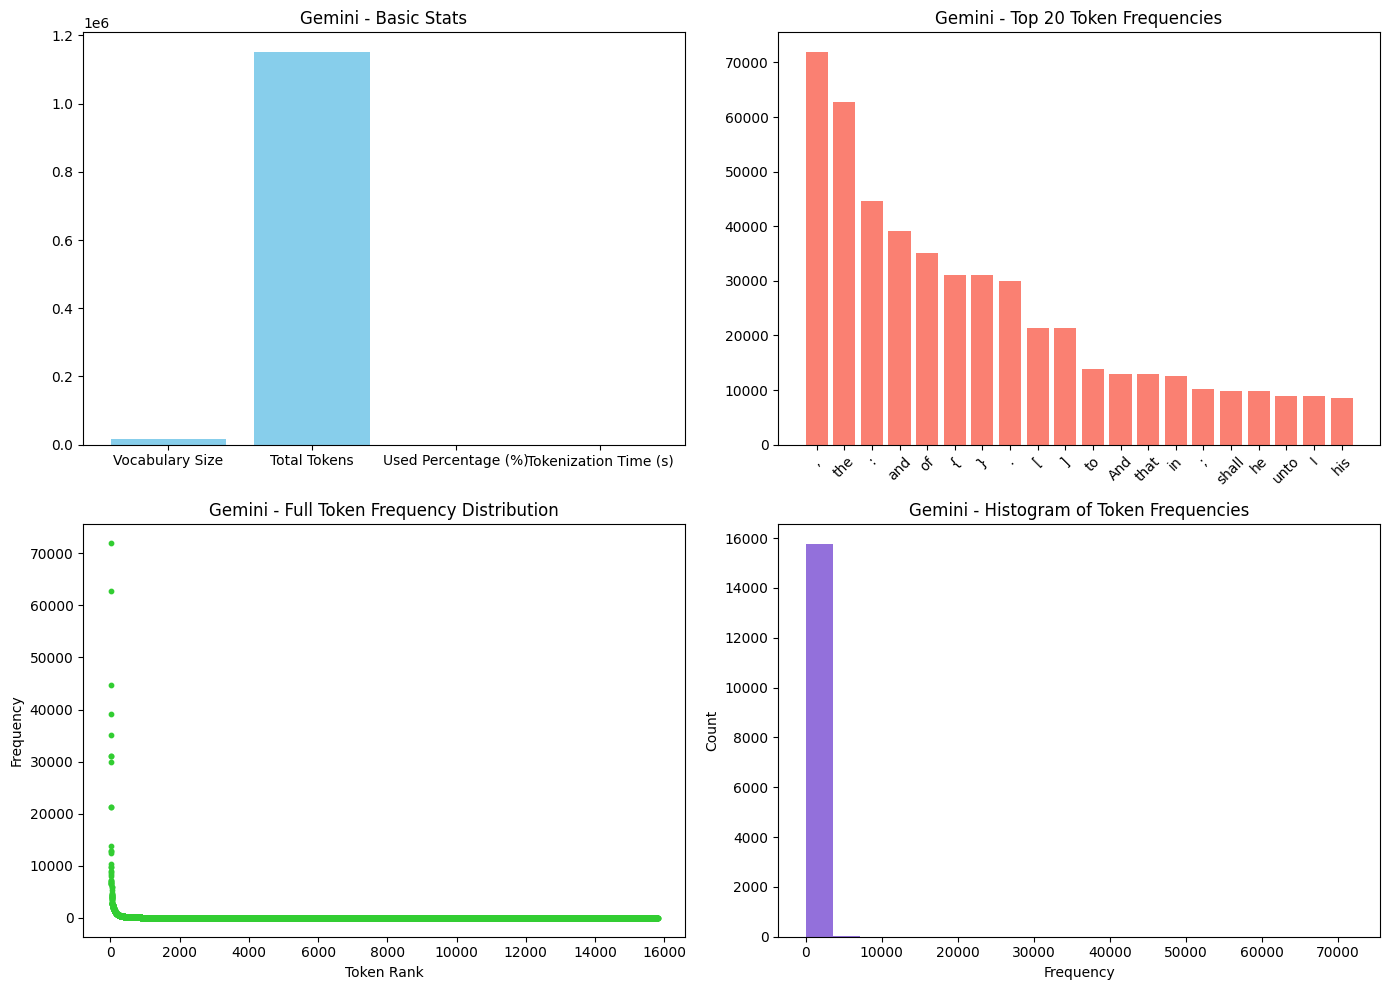

Tokenizing with Deepseek tokenizer...
Deepseek results: Total Tokens: 839627, Vocabulary: 39051, Usage Percentage: 4.65%, Time: 0.0149s


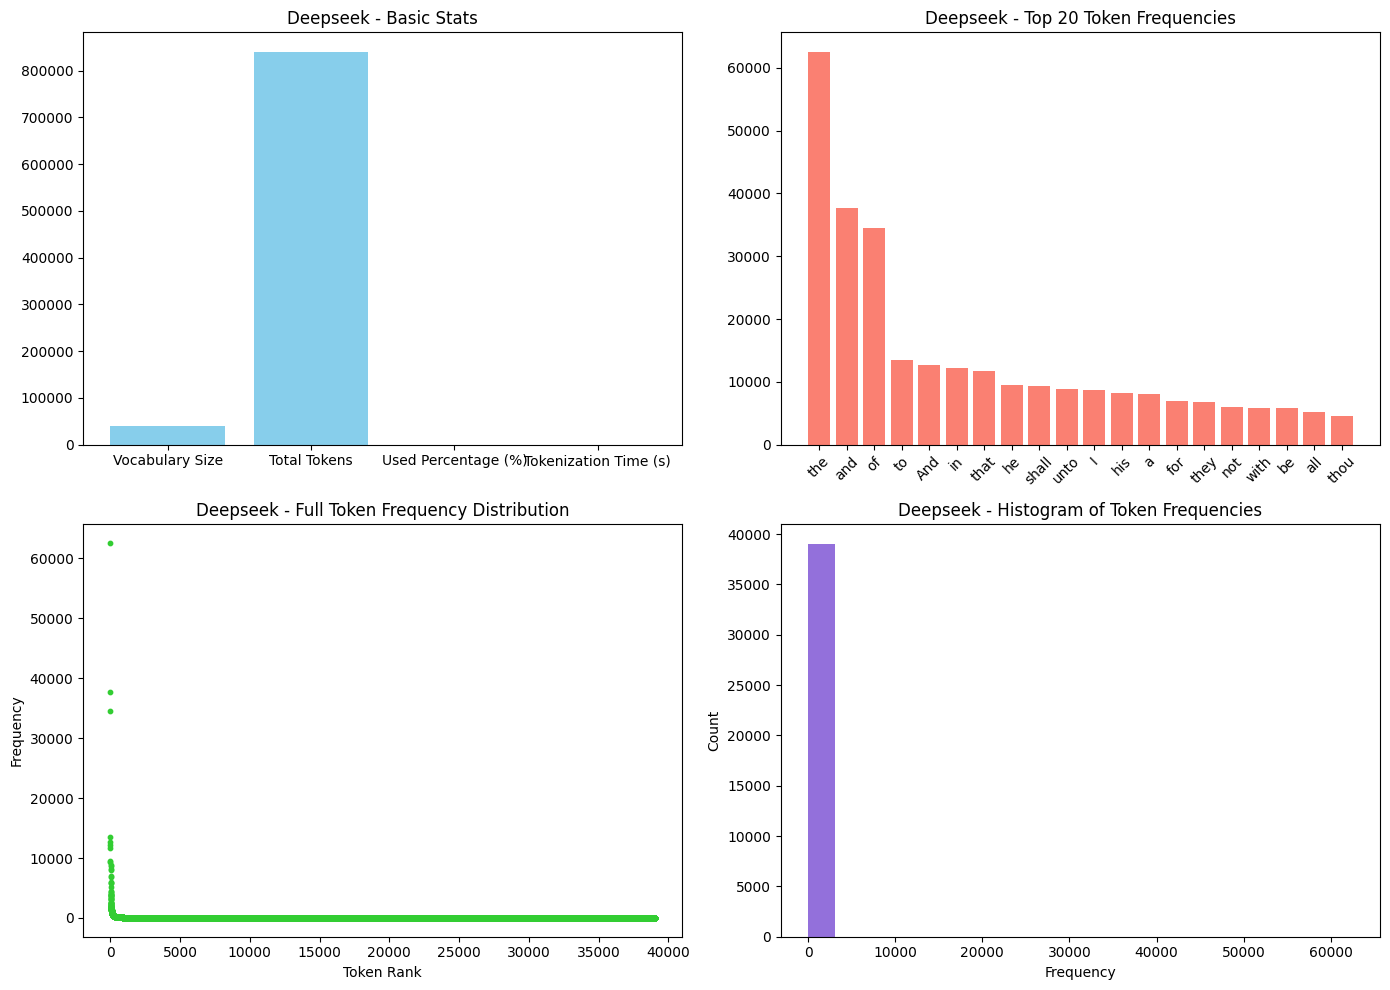

In [ ]:
import requests
import time
import io
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from PyPDF2 import PdfReader
import tiktoken
from transformers import AutoTokenizer  

# --- Configuration and Mock Data ---
# List of pdf urls (for now, we're using a single mocked PDF URL)
PDF_URLS = [
    "https://www.holybooks.com/wp-content/uploads/2010/05/The-Holy-Bible-King-James-Version.pdf"  # Replace with actual PDF URL(s)
]

qwen3 = AutoTokenizer.from_pretrained('Qwen/Qwen3-0.6B')
# Define the tokenizers (we assume that 'o200k' and 'cl100k' are available in tiktoken)
# For demonstration, we use tiktoken.get_encoding to get a tokenizer.
# We will also define mocked tokenizers for Gemeni and Deepseek.
TOKENIZER_CONFIGS = {
    "O200K": lambda text: tiktoken.get_encoding("o200k_base").encode(text),
    "CL100K": lambda text: tiktoken.get_encoding("cl100k_base").encode(text),
    "Gemini": lambda text: gemini_tokenizer(text),
    "Deepseek": lambda text: deepseek_tokenizer(text),
    "qwen3": lambda text: AutoTokenizer.from_pretrained('Qwen/Qwen3-0.6B')
}

# --- Mocked Tokenizers for Gemeni and Deepseek ---
def gemini_tokenizer(text):
    """
    A mocked tokenizer for Gemeni.
    This example splits on whitespace and punctuation.
    In practice, replace with the actual Gemeni tokenizer interface.
    """
    import re
    # A simple regex for tokenization (mock)
    tokens = re.findall(r"\w+|[^\w\s]", text, re.UNICODE)
    return tokens

def deepseek_tokenizer(text):
    """
    A mocked tokenizer for Deepseek.
    This example splits on whitespace.
    In practice, replace with the actual Deepseek tokenizer interface, 
    e.g., using HuggingFace's tokenizers.
    """
    return text.split()

# --- Function to Download and Extract PDF Text ---
def download_pdf_text(url):
    print(f"Downloading PDF from: {url}")
    response = requests.get(url)
    response.raise_for_status()
    with io.BytesIO(response.content) as open_pdf:
        reader = PdfReader(open_pdf)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""
    return text

# --- Function to Process Tokenization and Gather Metrics ---
def tokenize_and_analyze(text, tokenizer_fn):
    start_time = time.time()
    tokens = tokenizer_fn(text)
    elapsed_time = time.time() - start_time

    # Frequency distribution
    freq = Counter(tokens)
    
    # Number of different tokens (vocabulary size)
    vocab_size = len(freq)
    total_tokens = len(tokens)
    used_percentage = (vocab_size / total_tokens) * 100 if total_tokens > 0 else 0

    # Usage: list of (token, count) sorted by count desc
    sorted_usage = freq.most_common()

    metrics = {
        "tokens": tokens,
        "vocab_size": vocab_size,
        "total_tokens": total_tokens,
        "used_percentage": used_percentage,
        "elapsed_time": elapsed_time,
        "frequency": sorted_usage,
    }
    return metrics

# --- Function to Plot Graphs ---
def plot_metrics(metrics_dict, tokenizer_name):
    metrics = metrics_dict[tokenizer_name]

    # Plot 1: Basic stats bar chart of vocabulary size, total tokens, usage percentage, tokenization speed
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    stat_labels = ["Vocabulary Size", "Total Tokens", "Used Percentage (%)", "Tokenization Time (s)"]
    stat_values = [metrics["vocab_size"], metrics["total_tokens"], metrics["used_percentage"], metrics["elapsed_time"]]
    axs[0].bar(stat_labels, stat_values, color="skyblue")
    axs[0].set_title(f"{tokenizer_name} - Basic Stats")

    # Plot 2: Frequency distribution of top 20 tokens
    top_tokens = metrics["frequency"][:20]
    tokens, counts = zip(*top_tokens) if top_tokens else ([], [])
    axs[1].bar(tokens, counts, color="salmon")
    axs[1].set_title(f"{tokenizer_name} - Top 20 Token Frequencies")
    axs[1].tick_params(axis='x', rotation=45)

    # Plot 3: Detailed usage frequency distribution (all tokens) as a scatter plot
    all_tokens = list(metrics["frequency"])
    token_indexes = list(range(1, len(all_tokens)+1))
    all_counts = [count for token, count in metrics["frequency"]]
    axs[2].scatter(token_indexes, all_counts, color="limegreen", s=10)
    axs[2].set_title(f"{tokenizer_name} - Full Token Frequency Distribution")
    axs[2].set_xlabel("Token Rank")
    axs[2].set_ylabel("Frequency")

    # Plot 4: Histogram of token frequencies
    axs[3].hist(all_counts, bins=20, color="mediumpurple")
    axs[3].set_title(f"{tokenizer_name} - Histogram of Token Frequencies")
    axs[3].set_xlabel("Frequency")
    axs[3].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# --- Main Execution ---
def main():
    # Dictionary to store metrics for each tokenizer for each pdf
    results = defaultdict(dict)   # structure: results[pdf_url][tokenizer_name] = metrics

    for pdf_url in PDF_URLS:
        try:
            pdf_text = download_pdf_text(pdf_url)
            print(f"PDF downloaded. Length of text: {len(pdf_text)} characters.")
        except Exception as e:
            print(f"Error downloading or reading PDF from {pdf_url}: {e}")
            continue

        for tokenizer_name, tokenizer_fn in TOKENIZER_CONFIGS.items():
            print(f"Tokenizing with {tokenizer_name} tokenizer...")
            metrics = tokenize_and_analyze(pdf_text, tokenizer_fn)
            results[pdf_url][tokenizer_name] = metrics
            print(f"{tokenizer_name} results: Total Tokens: {metrics['total_tokens']}, Vocabulary: {metrics['vocab_size']}, "
                  f"Usage Percentage: {metrics['used_percentage']:.2f}%, Time: {metrics['elapsed_time']:.4f}s")
            # Plot graphs per tokenizer per pdf (can later be modified to plot comparisons across pdfs)
            plot_metrics({tokenizer_name: metrics}, tokenizer_name)

if __name__ == "__main__":
    main()


In [7]:
import certifi
certifi.where()

'/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/certifi/cacert.pem'

usage: ipykernel_launcher.py [-h] --tokenizer TOKENIZER --language
                             {english,german,french,spanish,chinese,japanese}
                             --word WORD [--chunk-size CHUNK_SIZE]
                             [--max-tries MAX_TRIES] [--seed SEED]
ipykernel_launcher.py: error: the following arguments are required: --tokenizer, --language, --word


SystemExit: 2

/Users/m0818461/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3680: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
